xy_coord_tensor:torch.Size([400, 400, 2])
Epoch 0, loss = 0.097
torch.Size([3, 400, 400])
generated: tensor([[[0.2585, 0.2217, 0.2633,  ..., 0.4061, 0.4061, 0.4061],
         [0.4061, 0.3816, 0.3860,  ..., 0.4061, 0.4061, 0.4061],
         [0.4061, 0.2115, 0.2996,  ..., 0.4061, 0.4061, 0.4061],
         ...,
         [0.7476, 0.6097, 0.7360,  ..., 0.9528, 0.8286, 0.9882],
         [0.8528, 0.7199, 0.7796,  ..., 0.9977, 0.9618, 0.9883],
         [0.6226, 0.6212, 0.7159,  ..., 0.9299, 0.6212, 0.8626]],

        [[0.2672, 0.1956, 0.2120,  ..., 0.4042, 0.4042, 0.4042],
         [0.4042, 0.3864, 0.3838,  ..., 0.4042, 0.4042, 0.4042],
         [0.4042, 0.2106, 0.3056,  ..., 0.4042, 0.4042, 0.4042],
         ...,
         [0.2398, 0.3625, 0.3261,  ..., 0.4285, 0.3940, 0.4210],
         [0.2305, 0.2186, 0.2152,  ..., 0.4432, 0.4001, 0.4279],
         [0.2697, 0.2565, 0.3370,  ..., 0.4186, 0.3409, 0.4246]],

        [[0.2567, 0.1650, 0.1994,  ..., 0.4093, 0.4093, 0.4093],
         [0.4093, 0.38

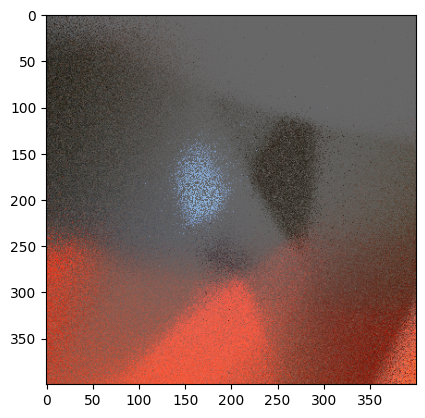

Epoch 100, loss = 0.082
torch.Size([3, 400, 400])
generated: tensor([[[0.3726, 0.4083, 0.4083,  ..., 0.4129, 0.4083, 0.4083],
         [0.4083, 0.4083, 0.3543,  ..., 0.4089, 0.4130, 0.4083],
         [0.4083, 0.4066, 0.3647,  ..., 0.4022, 0.4115, 0.4161],
         ...,
         [0.7459, 0.7360, 0.7006,  ..., 0.9872, 0.9962, 0.9161],
         [0.7626, 0.7114, 0.7223,  ..., 0.9612, 0.8867, 0.9813],
         [0.7555, 0.8067, 0.6288,  ..., 0.8598, 0.9630, 0.9452]],

        [[0.3393, 0.3961, 0.3961,  ..., 0.4221, 0.3961, 0.3961],
         [0.3961, 0.3961, 0.2970,  ..., 0.3996, 0.4226, 0.3961],
         [0.3961, 0.3948, 0.3140,  ..., 0.3776, 0.4145, 0.4403],
         ...,
         [0.2985, 0.2892, 0.2950,  ..., 0.3694, 0.4004, 0.3941],
         [0.3295, 0.3289, 0.3008,  ..., 0.3754, 0.3616, 0.3484],
         [0.2787, 0.2357, 0.3052,  ..., 0.3580, 0.3397, 0.4020]],

        [[0.3237, 0.3965, 0.3965,  ..., 0.4380, 0.3965, 0.3965],
         [0.3965, 0.3965, 0.2687,  ..., 0.4020, 0.4388, 0.3965

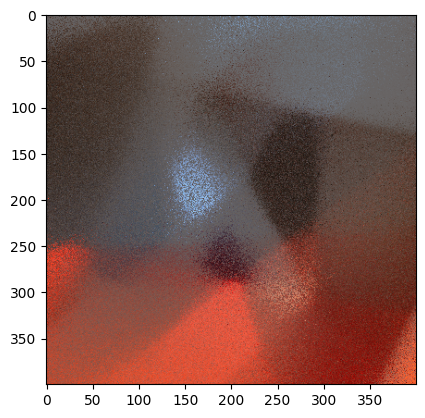

In [3]:
import torch
import torchvision.transforms as transforms
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import pdb

# params
crop_size = 400

# get image
img = imageio.imread('ca.jpg')[...,:3]/255. 
# plt.imshow(img)
# plt.show()

# convert to tensor
img_tensor = torch.Tensor(img).permute(2, 0, 1)
# print(img_tensor)
img_cropped = transforms.CenterCrop(crop_size)(img_tensor)
img_flatten = torch.reshape(img_cropped, (crop_size * crop_size, 3))


# test
img_crop = img_cropped.permute(1, 2, 0)
# img_crop = img_flatten.view( crop_size, crop_size, 3)


# Now, img_reshaped should have the same shape and values as img_cropped.


# img_crop = torch.reshape(img_cropped, (crop_size, crop_size, 3))
# img_crop =torch.reshape(img_flatten, (crop_size, crop_size, 3))
# img_crop = img_flatten.unsqueeze(0)
# img_crop = img_crop.reshape(img_crop, (crop_size, crop_size, 3))
img_crop.detach().numpy()
# print(img_crop.shape)


# plt.imshow(img_crop)
# plt.show()

# create the mesh grid
xy_range = list(map(lambda x: (x / (crop_size - 1) * 2) - 1, range(crop_size)))
xy_range_tensor = torch.Tensor(xy_range)
x_grid, y_grid = torch.meshgrid(xy_range_tensor, xy_range_tensor, indexing='ij')
xy_coord_tensor = torch.stack((x_grid, y_grid), dim= -1)
print(f'xy_coord_tensor:{xy_coord_tensor.shape}')
xy_flatten = torch.reshape(xy_coord_tensor, (crop_size * crop_size, 2))



# pdb.set_trace()


import torch.nn as nn


# mlp
class MLP(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__()

        # self.flatten = nn.Flatten()

        self.neural_net = nn.Sequential(
            
            # layer 1
            nn.Linear(in_features, hidden_features),
            nn.ReLU(),
            nn.Dropout(p = 0.5),

            # layer 2
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Dropout(p = 0.5),

            # layer 3
            nn.Linear(hidden_features, out_features),
            # nn.Tanh()
            nn.Sigmoid()

        )

    def forward(self, x):
        return self.neural_net(x)

# declare network
net = MLP(in_features=2, hidden_features=300, out_features=3)

model = net

# print(model)

from img_dataset import img_flatten, xy_flatten, crop_size, img_cropped, xy_coord_tensor
from model import model
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import torch

# params
learning_rate = 0.01
num_epochs = 701

# set the target
# target = img_flatten
target = img_cropped

# optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate) 

for epoch in range(num_epochs):

    model.train()

    # for mlp
    generated = model(xy_coord_tensor)
    generated = generated.permute(2, 0, 1)
    # print(f'generated_shape: {generated.shape}')

    # loss = criterion(generated, target)
    loss = nn.functional.l1_loss(target, generated)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch %d, loss = %.03f' % (epoch, float(loss)))
        # print(generated.shape)
        # generated = generated.view((crop_size, crop_size, 3)).detach().numpy()
        print(generated.shape)
        # generated = torch.reshape(generated, (crop_size, crop_size, 3)).detach().numpy()
        # generated = generated * 255
        print(f'generated: {generated}')
        # generated = (generated * 255).astype(np.uint8)
        # generated = (generated - generated.min()) / (generated.max() - generated.min())
        # print(generated)
        generated = generated.permute(1, 2, 0).detach().numpy()
        plt.imshow(generated)
        plt.show()
model.eval()
